In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re

In [2]:
# get pro-football-reference.com play by play data

df_2014 = pd.read_csv('2014_master.csv')
df_2015 = pd.read_csv('2015_master.csv')
df_2016 = pd.read_csv('2016_master.csv')
df_2017 = pd.read_csv('2017_master.csv')

In [3]:
df_2014['Season'] = 2014
df_2015['Season'] = 2015
df_2016['Season'] = 2016
df_2017['Season'] = 2017

df = pd.concat([df_2014, df_2015, df_2016, df_2017])

# not a real game type, dropped
df = df[df.game_type_0!=1]

# index counter to be removed
df.drop(['Unnamed: 0','game_type_0'], axis=1, inplace=True)

In [4]:
#rename columns so more readable

new_columns = df.columns.values
new_columns[58:65] = ['TNF', 'Sunday_AM', 'Sunday_PM', 'SNF', 'MNF', 'England', 'Saturday']
df.columns = new_columns

In [5]:
df.head()

,Away_team,Home_Line,Home_cover,Home_team,Season,Week,away_DL_as_total,away_DL_compl_perc,away_DL_def_as_total,away_DL_def_comp_perc,...,home_SL_def_as_total,home_SL_def_comp_perc,home_SM_as_total,home_SM_compl_perc,home_SM_def_as_total,home_SM_def_comp_perc,home_SR_as_total,home_SR_compl_perc,home_SR_def_as_total,home_SR_def_comp_perc
0,PIT,-2.5,1,BAL,2014,2,0.041667,0.500000,0.032609,0.333333,...,0.125000,0.777778,0.234043,0.727273,0.166667,0.500000,0.255319,0.583333,0.125000,0.555556
1,MIA,0.0,1,BUF,2014,2,0.070796,0.000000,0.066667,0.333333,...,0.182609,0.809524,0.075472,0.750000,0.069565,0.875000,0.113208,0.666667,0.121739,0.642857
2,NOR,6.0,1,CLE,2014,2,0.041667,0.666667,0.033333,0.250000,...,0.097345,0.636364,0.040000,0.333333,0.079646,0.555556,0.120000,0.555556,0.088496,0.900000
3,DAL,-4.0,0,TEN,2014,2,0.026667,0.500000,0.010870,0.000000,...,0.109589,0.875000,0.054054,0.833333,0.027397,0.000000,0.180180,0.750000,0.082192,0.833333
4,ARI,-2.0,0,NYG,2014,2,0.000000,0.000000,0.017857,0.500000,...,0.101124,0.777778,0.069444,0.800000,0.089888,1.000000,0.236111,0.470588,0.078652,0.571429


In [6]:
#Counting nulls, too many feautures for df.info() to show us the amount of nulls

for col in df.columns:
    nulls = df[col].isnull().sum()        
    print(col + ' nullls: ' + str(nulls))

Away_team nullls: 0
Home_Line nullls: 2
Home_cover nullls: 0
Home_team nullls: 0
Season nullls: 0
Week nullls: 0
away_DL_as_total nullls: 0
away_DL_compl_perc nullls: 0
away_DL_def_as_total nullls: 0
away_DL_def_comp_perc nullls: 0
away_DM_as_total nullls: 0
away_DM_compl_perc nullls: 0
away_DM_def_as_total nullls: 0
away_DM_def_comp_perc nullls: 0
away_DR_as_total nullls: 0
away_DR_compl_perc nullls: 0
away_DR_def_as_total nullls: 0
away_DR_def_comp_perc nullls: 0
away_LE_as_total nullls: 0
away_LE_compl_perc nullls: 0
away_LE_def_as_total nullls: 0
away_LE_def_comp_perc nullls: 0
away_LG_as_total nullls: 0
away_LG_compl_perc nullls: 0
away_LG_def_as_total nullls: 0
away_LG_def_comp_perc nullls: 0
away_LT_as_total nullls: 0
away_LT_compl_perc nullls: 0
away_LT_def_as_total nullls: 0
away_LT_def_comp_perc nullls: 0
away_M_as_total nullls: 0
away_M_compl_perc nullls: 0
away_M_def_as_total nullls: 0
away_M_def_comp_perc nullls: 0
away_RE_as_total nullls: 0
away_RE_compl_perc nullls: 0
aw

In [7]:
# Just homelines, we cant pick ATS if there is no spread
    
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
# Record against the spread

teams = list(df.Home_team.unique())

print('After Week 1 ATS by team past 4 years: ')
for team in teams:
    df_team = df[(df['Home_team']==team) | (df['Away_team']==team)]
    df_team.reset_index(drop=True, inplace=True)
    for year in df['Season'].unique():
        covers = 0
        for game in range(len(df_team)):
            if (df_team.Season[game]==year)&(((df_team.Home_team[game] == team) & (df_team.Home_cover[game] == 1)) | ((df_team.Away_team[game] == team) & (df_team.Home_cover[game] == 0))):
                covers+=1
        print(str(year) + ' ' + team + ' ' + str(covers) + '-' + str(len(df_team[df_team.Season==year])-covers))


After Week 1 ATS by team past 4 years: 
2014 BAL 8-7
2015 BAL 6-9
2016 BAL 7-8
2017 BAL 8-7
2014 BUF 8-7
2015 BUF 7-8
2016 BUF 7-8
2017 BUF 8-7
2014 CLE 8-7
2015 CLE 6-9
2016 CLE 5-10
2017 CLE 3-12
2014 TEN 2-13
2015 TEN 5-10
2016 TEN 8-7
2017 TEN 8-7
2014 NYG 7-8
2015 NYG 8-7
2016 NYG 8-7
2017 NYG 7-8
2014 CAR 7-8
2015 CAR 11-4
2016 CAR 6-8
2017 CAR 8-7
2014 WAS 5-10
2015 WAS 9-6
2016 WAS 10-5
2017 WAS 7-8
2014 MIN 8-7
2015 MIN 13-2
2016 MIN 8-7
2017 MIN 12-3
2014 CIN 7-8
2015 CIN 11-4
2016 CIN 6-9
2017 CIN 9-6
2014 TAM 7-8
2015 TAM 7-8
2016 TAM 8-7
2017 TAM 8-8
2014 LAC 6-9
2015 LAC 7-8
2016 LAC 6-9
2017 LAC 9-6
2014 OAK 7-8
2015 OAK 8-7
2016 OAK 9-6
2017 OAK 4-11
2014 GNB 8-7
2015 GNB 6-7
2016 GNB 7-8
2017 GNB 6-9
2014 DEN 8-7
2015 DEN 7-8
2016 DEN 8-7
2017 DEN 4-11
2014 SFO 4-11
2015 SFO 6-9
2016 SFO 4-11
2017 SFO 9-6
2014 IND 10-5
2015 IND 8-7
2016 IND 8-7
2017 IND 8-7
2014 ATL 7-8
2015 ATL 5-10
2016 ATL 10-5
2017 ATL 8-7
2014 LAR 8-7
2015 LAR 6-8
2016 LAR 5-10
2017 LAR 8-7
2014 P

In [9]:
# create new columns with difference between teams off and defense completion percentage
    
for col in range(66,108,4):
    title = df.columns[col][5:]
    df['home_off_spread_%s' % title] = df[df.columns[col]]-df[df.columns[col-57]]
for col in range(7,59,4):
    title = df.columns[col][5:]
    df['away_off_spread_%s' % title] = df[df.columns[col]]-df[df.columns[col+61]]

In [10]:
# create new columns with difference between how often offenses run type of play vs how often defenses see type of play
    
for col in range(69,111,4):
    title = df.columns[col][5:]
    df['home_off_spread_%s' % title] = df[df.columns[col]]-df[df.columns[col-57]]
for col in range(6,58,4):
    title = df.columns[col][5:]
    df['away_off_spread_%s' % title] = df[df.columns[col]]-df[df.columns[col+61]]

In [11]:
# time between games for both teams
        
df['game_type'] = df[['TNF', 'Sunday_AM', 'Sunday_PM', 'SNF', 'MNF', 'England', 'Saturday']].idxmax(axis=1)

def time_btwn(x):
    week = x[0]
    team = x[1]
    season = x[2]
    game_t = {'TNF':0, 'Sunday_AM':3, 'Sunday_PM':3, 'SNF':3, 'MNF':4, 'England':3, 'Saturday':2}
    try: 
        week_after = df[((df['Week']==week) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['game_type'].iloc[0]
        try:
            week_before = df[((df['Week']==week-1) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['game_type'].iloc[0]
            weekly = 7
        except:
            week_before = df[((df['Week']==week-2) & (df['Season']==season)) & ((df['Home_team']==team) | (df['Away_team']==team))]['game_type'].iloc[0]
            weekly = 14
        tb = game_t[week_after] + weekly - game_t[week_before]
    except:
        tb = 7 
    return tb

df['Home_team_days_after_last_game'] = df[['Week','Home_team','Season']].apply(time_btwn, axis=1)
df['Away_team_days_after_last_game'] = df[['Week','Away_team','Season']].apply(time_btwn, axis=1)

In [12]:
# dropping tampa and miami week 2 2017 games because they had no week 1 data because of flood 

for row in range(len(df[(df['Week']==2) & (df['Season']==2017)])):
    if (df['Home_team'][row]=='MIA') | (df['Home_team'][row]=='TAM') | (df['Away_team'][row]=='MIA') | (df['Away_team'][row]=='TAM'):
        df = df.drop(row)

In [13]:
# join new dummy game types and timezones and drop old game types

df.drop('game_type', axis=1, inplace=True)

# creating teams location features 
#home timezone

def h_tz(x):
    if x in ['LAC','OAK','SEA','LAR','SFO']:
        tz = 'Home_team_west'
    elif x in ['DEN','ARI']:
        tz = 'Home_team_mtn'
    elif x in ['KAN','IND','NOR','DET','MIN','CHI','TEN','GNB','HOU','DAL']:
        tz = 'Home_team_midwest'
    else:
        tz = 'Home_team_east'
    return tz

df['Home_tz'] = df['Home_team'].apply(h_tz)    
        
df = df.join(pd.get_dummies(df['Home_tz']))
df.drop('Home_tz', axis=1, inplace=True)

#away timezone

def a_tz(x):
    if x in ['LAC','OAK','SEA','LAR','SFO']:
        tz = 'Away_team_west'
    elif x in ['DEN','ARI']:
        tz = 'Away_team_mtn'
    elif x in ['KAN','IND','NOR','DET','MIN','CHI','TEN','GNB','HOU','DAL']:
        tz = 'Away_team_midwest'
    else:
        tz = 'Away_team_east'
    return tz

df['Away_tz'] = df['Away_team'].apply(a_tz)  

df = df.join(pd.get_dummies(df['Away_tz']))
df.drop('Away_tz', axis=1, inplace=True)

# games timezone

def g_tz(x):
    if x[1]==1:
        tz = 'game_eng'
    elif x[0] in ['LAC','OAK','SEA','LAR','SFO']:
        tz = 'game_west'
    elif x[0] in ['DEN','ARI']:
        tz = 'game_mtn'
    elif x[0] in ['KAN','IND','NOR','DET','MIN','CHI','TEN','GNB','HOU','DAL']:
        tz = 'game_midwest'
    else:
        tz = 'game_east'
    return tz

df['game_tz'] = df[['Home_team','England']].apply(g_tz, axis=1)  

df = df.join(pd.get_dummies(df['game_tz']))
df.drop('game_tz', axis=1, inplace=True)

In [14]:
# Adding column for division games

def division_game(x):
    AFC_east = ['NWE','BUF','MIA','NYJ']
    AFC_north = ['PIT','BAL','CIN','CLE']
    AFC_south = ['JAX','TEN','IND','HOU']
    AFC_west = ['KAN','LAC','OAK','DEN']
    NFC_east = ['PHI','DAL','WAS','NYG']
    NFC_north = ['MIN','DET','GNB','CHI']
    NFC_south = ['NOR','CAR','ATL','TAM']
    NFC_west = ['LAR','SEA','ARI','SFO']
    home = x[0]
    away = x[1]
    if ((home in AFC_east) & (away in AFC_east)) | ((home in AFC_north) & (away in AFC_north)):
        d = 1
    elif ((home in AFC_south) & (away in AFC_south)) | ((home in AFC_west) & (away in AFC_west)):
        d = 1
    elif ((home in NFC_east) & (away in NFC_east)) | ((home in NFC_north) & (away in NFC_north)):
        d = 1
    elif ((home in NFC_south) & (away in NFC_south)) | ((home in NFC_west) & (away in NFC_west)):
        d = 1
    else:
        d=0
    return d


df['Division_game'] = df[['Home_team','Away_team']].apply(division_game, axis=1)

In [15]:
# import pg and TO numbers

pg = pd.read_csv('NFL_scrape.csv')
pg = pg.drop('Unnamed: 0', axis=1)
df_hw = pd.merge(df,pg,how='left', on=['Week','Season','Home_team','Away_team'])

In [16]:
#dropping wins, would be data leakage for our models
df = df_hw.drop('Home_win',axis=1)

In [17]:
### Statistical analysis

In [18]:
df.corr()['Home_cover']

# as can be seen nothing correlates close to significantly with covering the spread. 
# the spread is well made and accounts for most of these factors

Home_Line               -0.000592
Home_cover               1.000000
Season                   0.017973
Week                     0.008113
away_DL_as_total        -0.043298
away_DL_compl_perc       0.020538
away_DL_def_as_total    -0.014583
away_DL_def_comp_perc   -0.038083
away_DM_as_total         0.013136
away_DM_compl_perc      -0.045278
away_DM_def_as_total     0.092449
away_DM_def_comp_perc   -0.032987
away_DR_as_total         0.035076
away_DR_compl_perc       0.017423
away_DR_def_as_total    -0.013548
away_DR_def_comp_perc    0.036697
away_LE_as_total         0.083053
away_LE_compl_perc      -0.012848
away_LE_def_as_total    -0.027756
away_LE_def_comp_perc   -0.038755
away_LG_as_total         0.000002
away_LG_compl_perc      -0.016521
away_LG_def_as_total    -0.051491
away_LG_def_comp_perc   -0.035489
away_LT_as_total        -0.011521
away_LT_compl_perc      -0.034739
away_LT_def_as_total    -0.021292
away_LT_def_comp_perc   -0.018950
away_M_as_total          0.021379
away_M_compl_p

In [19]:
df_hw.corr()['Home_win'][-14:-6]

# when we look at just wins we can see what affects wins

Home_ppg_for        0.101891
Away_ppg_for       -0.149545
Home_ppg_against   -0.182823
Away_ppg_against    0.044267
Home_ypg_for        0.083196
Away_ypg_for       -0.122784
Home_ypg_against   -0.099523
Away_ypg_against   -0.015323
Name: Home_win, dtype: float64

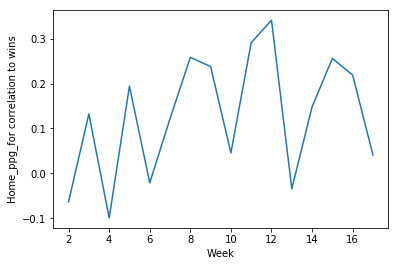

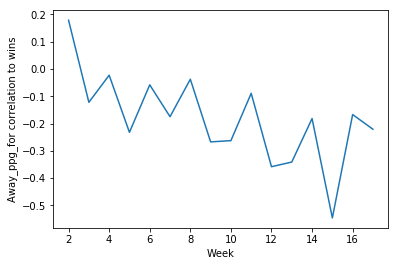

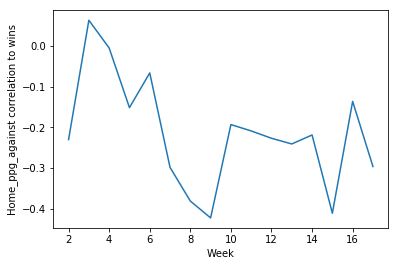

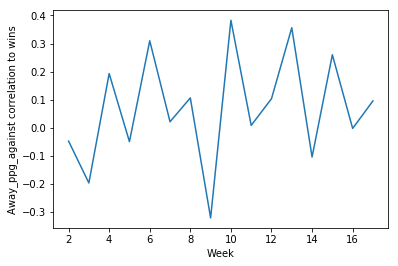

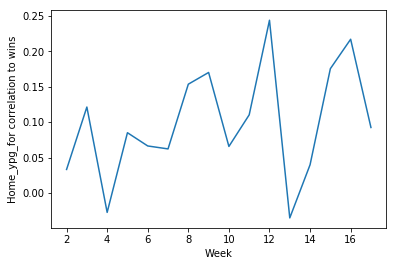

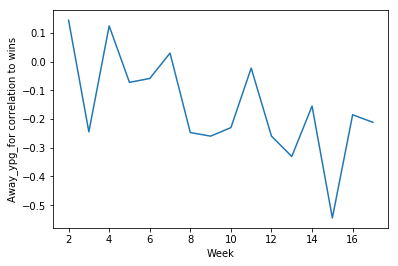

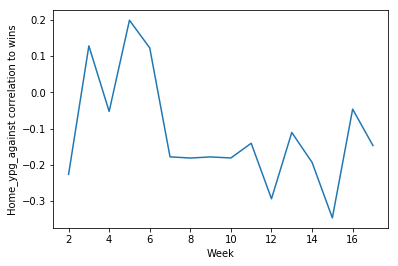

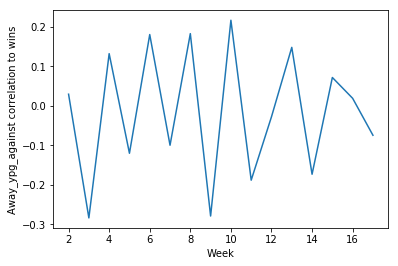

In [20]:
ot = {}

for w in df_hw.Week.unique():
    ot[w]=df_hw[df_hw.Week == w].corr()['Home_win'][-14:-6]
ot_g = pd.DataFrame(ot)

for feat in ot_g.index:
    plt.plot(ot_g.loc[feat])
    plt.xlabel('Week')
    plt.ylabel(feat + ' correlation to wins')
    plt.show()

In [21]:
# we can see trend in correlation of variables as weeks go on, which represents having more data. For some features, 
# more data creates a stronger correlation. This could indicate an improvement in model performance in later weeks

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [23]:
#split df by season to test how we would do on 2017 season 

df_test_by_season = df[df['Season']==2017]
df_train_by_season = df[df['Season']!=2017]

y_train = df_train_by_season['Home_cover']
X_train = df_train_by_season.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)

y_test = df_test_by_season['Home_cover']
X_test = df_test_by_season.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)

In [24]:
# or random split if we chose to 

'''y = df['Home_cover']
X = df.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)'''

"y = df['Home_cover']\nX = df.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)"

In [25]:
params = [{'n_estimators': [9,12,15],'max_features': ['auto','sqrt','log2'], 'max_depth':[9,12,15]}]

clf = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring='accuracy', cv=StratifiedKFold(10)).fit(X_train, y_train)
clf.cv_results_
clf.best_params_
print('RFC GridSearchCV Best Score: ', clf.best_score_, ' with ' , clf.best_params_)

print('RFC Test Score: ', accuracy_score(y_test, clf.predict(X_test)))
print('RFC Train Score: ', accuracy_score(y_train, clf.predict(X_train)))

RFC GridSearchCV Best Score:  0.541258741259  with  {'max_depth': 12, 'max_features': 'log2', 'n_estimators': 9}
RFC Test Score:  0.522821576763
RFC Train Score:  0.987412587413


In [26]:
#using top5 predictions and seeing how model would have performed with top five predictions

guess = list(zip(abs(clf.predict_proba(X_test)[:,1]-.5), y_test, [0 if x<.5 else 1 for x in clf.predict_proba(X_test)[:,1]]))
top5 = sorted(guess, reverse=True)[:5]
print(top5)

[(0.48120300751879697, 0, 1), (0.41016548463356983, 1, 1), (0.40864207678553671, 1, 0), (0.3888888888888889, 0, 0), (0.3888888888888889, 0, 0)]


In [27]:
# how model would have done by week in 2017 for top five predictions random forest

for week in range(2,18):
    df_test_by_week = df_test_by_season[df_test_by_season['Week']==week]

    y_test_by_week = df_test_by_week['Home_cover']
    X_test_by_week = df_test_by_week.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)

    guess = list(zip(abs(clf.predict_proba(X_test_by_week)[:,1]-.5), y_test_by_week, [0 if x<.5 else 1 for x in clf.predict_proba(X_test_by_week)[:,1]]))
    top5 = sorted(guess, reverse=True)[:5]
    print(top5)
    w = 0
    for acc in top5:
        if (acc[1]==acc[2]):
            w+=1
    print('Week %d record: ' % week)
    print(str(w) +'-' + str(len(top5)-w))

[(0.17037037037037034, 0, 0), (0.16666666666666669, 1, 0), (0.16666666666666669, 0, 0), (0.16666666666666663, 1, 1), (0.16666666666666663, 1, 1)]
Week 2 record: 
4-1
[(0.3888888888888889, 0, 0), (0.28148148148148144, 1, 0), (0.27777777777777779, 1, 1), (0.27777777777777779, 1, 0), (0.2647907647907648, 0, 0)]
Week 3 record: 
3-2
[(0.27777777777777779, 1, 0), (0.27777777777777779, 0, 1), (0.27777777777777779, 0, 0), (0.23333333333333328, 1, 1), (0.18518518518518517, 1, 0)]
Week 4 record: 
2-3
[(0.3888888888888889, 0, 0), (0.21871345029239769, 0, 0), (0.18055555555555558, 0, 0), (0.16666666666666663, 1, 1), (0.16296296296296298, 1, 1)]
Week 5 record: 
5-0
[(0.3057760141093474, 0, 1), (0.17965367965367962, 1, 1), (0.16666666666666669, 0, 0), (0.16666666666666663, 0, 1), (0.16666666666666663, 0, 1)]
Week 6 record: 
2-3
[(0.41016548463356983, 1, 1), (0.33333333333333337, 1, 1), (0.28284062028232582, 0, 0), (0.27777777777777779, 0, 1), (0.2647907647907648, 1, 0)]
Week 7 record: 
3-2
[(0.37654

In [28]:
# testing logistic regression

from sklearn.linear_model import LogisticRegression

n_params = [{'penalty':['l1','l2'], 'C':[.01,.1,1,10,100]}]
clf1 = GridSearchCV(LogisticRegression(), n_params, cv=5, scoring='accuracy').fit(X_train, y_train)

print('LR GridSearchCV f1 Score: ', clf1.best_score_, ' with ' , clf1.best_params_ )

print('LR Test Score: ', accuracy_score(y_test, clf1.predict(X_test))) 
print('LR Train Score: ', accuracy_score(y_train, clf1.predict(X_train)))

LR GridSearchCV f1 Score:  0.548251748252  with  {'C': 0.1, 'penalty': 'l1'}
LR Test Score:  0.55601659751
LR Train Score:  0.587412587413


In [29]:
# how model would have done by week in 2017 for top five predictions logistic regression

for week in range(2,18):
    df_test_by_week = df_test_by_season[df_test_by_season['Week']==week]

    y_test_by_week = df_test_by_week['Home_cover']
    X_test_by_week = df_test_by_week.drop(['Season','Home_team', 'Away_team', 'Home_cover'], axis=1)

    guess = list(zip(abs(clf1.predict_proba(X_test_by_week)[:,1]-.5), y_test_by_week, [0 if x<.5 else 1 for x in clf1.predict_proba(X_test_by_week)[:,1]]))
    top5 = sorted(guess, reverse=True)[:5]
    print(top5)
    w = 0
    for acc in top5:
        if (acc[1]==acc[2]):
            w+=1
    print('Week %d record: ' % week)
    print(str(w) +'-' + str(len(top5)-w))

[(0.2565174730303097, 1, 0), (0.25378326024895626, 1, 0), (0.16593118893308823, 0, 1), (0.14954602399966205, 0, 0), (0.13886016463237866, 0, 0)]
Week 2 record: 
2-3
[(0.15380794622719951, 0, 0), (0.14429029220893974, 1, 1), (0.1416062233811648, 1, 1), (0.11885020074627789, 0, 0), (0.11718714235411987, 1, 0)]
Week 3 record: 
4-1
[(0.11838917304578844, 0, 0), (0.1041151037507016, 0, 0), (0.088600964049536657, 0, 1), (0.080815827697783615, 1, 1), (0.079610789386908465, 0, 1)]
Week 4 record: 
3-2
[(0.14898517534528011, 1, 0), (0.11417873846369697, 0, 0), (0.11393734390234922, 0, 0), (0.074908344042180219, 0, 0), (0.057879509414633323, 0, 0)]
Week 5 record: 
4-1
[(0.1760940732109611, 1, 0), (0.12852342277537027, 0, 0), (0.12645495624202785, 1, 0), (0.11502973826572771, 1, 1), (0.097092359989396748, 1, 0)]
Week 6 record: 
2-3
[(0.11512401997709726, 1, 0), (0.106387261109746, 1, 0), (0.084096888917006785, 1, 0), (0.06866643293615865, 0, 0), (0.0629521264078724, 1, 1)]
Week 7 record: 
2-3
[(0.

In [30]:
# testing deep learning model

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [31]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(200, input_shape = (n_cols,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1))

In [32]:
# Compile the model
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=10)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=10)

adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=25)

adam = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=25)

adam = keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=25)

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 715 samples, validate on 241 samples
Epoch 1/30
715/715 [==============================] - 4s 6ms/step - loss: 0.6494 - acc: 0.4643 - val_loss: 0.7130 - val_acc: 0.4564
Epoch 2/30
715/715 [==============================] - 2s 2ms/step - loss: 0.3059 - acc: 0.4909 - val_loss: 0.2739 - val_acc: 0.5145
Epoch 3/30
715/715 [==============================] - 2s 2ms/step - loss: 0.3019 - acc: 0.4979 - val_loss: 0.3573 - val_acc: 0.4772
Epoch 4/30
715/715 [==============================] - 2s 2ms/step - loss: 0.3021 - acc: 0.5315 - val_loss: 0.2558 - val_acc: 0.5436
Epoch 5/30
715/715 [==============================] - 2s 3ms/step - loss: 0.3007 - acc: 0.4937 - val_loss: 0.2643 - val_acc: 0.5270
Epoch 6/30
715/715 [==============================] - 2s 3ms/step - loss: 0.2934 - acc: 0.4853 - val_loss: 0.2578 - val_acc: 0.4772
Epoch 7/30
715/715 [==============================] - 2s 3ms/step - loss: 0.2676 - acc: 0.5231 - val_loss: 0.3156 - val_acc: 0.5187
Epoch 8/30
715/715 [==========

715/715 [==============================] - 3s 4ms/step - loss: 0.2310 - acc: 0.6154 - val_loss: 0.2542 - val_acc: 0.4813
Epoch 2/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2309 - acc: 0.6042 - val_loss: 0.2546 - val_acc: 0.4938
Epoch 3/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2356 - acc: 0.5958 - val_loss: 0.2547 - val_acc: 0.4938
Epoch 4/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2332 - acc: 0.6112 - val_loss: 0.2547 - val_acc: 0.4938
Epoch 5/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2325 - acc: 0.6196 - val_loss: 0.2548 - val_acc: 0.4979
Epoch 6/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2296 - acc: 0.6182 - val_loss: 0.2549 - val_acc: 0.4979
Epoch 7/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2342 - acc: 0.6154 - val_loss: 0.2551 - val_acc: 0.4938
Epoch 8/15
715/715 [==============================] - 1s 1ms/step - loss: 0.2352 - acc:

In [33]:
# deep learning model is still a work in progress